## 날짜+시간 관련 부분 EDA(시간대별)

시간 정보(time-zone포함)가 존재하는 열
- /header/date (의미 없는 값(1970-01-01 00:00:00+00:00)이 존재)
- /header/received/0/src → /header/received/0/src_at (형식 1의 경우)
- /header/received/0/date → /header/received/0/src_at (형식 2의 경우)
- /header/received/1/src 中 at = /header/received/1/date (같다고 예상)
- /header/received/2/src 中 at = /header/received/2/date (같다고 예상)
- /header/header/date (의미 없는 값(1970-01-01 00:00:00+00:00)이 대부분)
- /header/header/received → 파싱필요
- /header/received/3/src 中 at = /header/received/3/date (같다고 예상)
- /header/received/4/src 中 at = /header/received/4/date (같다고 예상)
- /header/received/5/src 中 at = /header/received/5/date (같다고 예상)
<br>
<br> => /header/date, /header/received/0/src_at, /header/received/n/date(1≤n≤5), /header/header/date, /header/header/received(아직전처리안됨)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
eml_df = pd.read_csv("../../parsed_eml_3.csv", parse_dates=["/header/date", "/header/header/date", "/header/received/0/src_at", 
                                               "/header/received/1/date", "/header/received/2/date", 
                                               "/header/received/3/date", "/header/received/4/date", "/header/received/5/date"],
                      date_parser=lambda col: pd.to_datetime(col, utc=True))

In [3]:
eml_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,file_name,/header/subject,/header/from,/header/to,/header/date,last_num,/header/received/0/src,...,/header/header/x-mailer-sent-by,/header/header/x-mailer-lid,/header/header/x-mailer-sid,/header/cc,/header/header/x-virus-scanned,/header/header/cc,/header/received/0/src_at,ori_sender_ip,ori_sender_server,ori_receiver_mail
0,0,0,31644,0b200e46-d0f8-4219-8d9d-2266ad6c194d.eml,Ȳ򺸸 ΰ! 2̸ OK! usofq apqb,jjfkjsfjk4514262@nate.com,k003912@dumburo.com,2019-08-29 11:39:36+00:00,2,"from 58.248.209.14(58.248.209.14) at thu, 29 a...",...,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-29 11:22:27+00:00,90.12.107.167,73.132.221.32,k003912@dumburo.com
1,1,1,31645,0b20dbf8-35fd-45e6-b519-5281d0fdedca.eml,ȭ BJ ̺ մϴ.,yenjuy@outlook.kr,hanh5@sannoroo.co.kr,2020-04-05 20:29:25+00:00,2,"from 122.97.133.171(122.97.133.171) at mon, 06...",...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-05 20:06:38+00:00,71.71.206.136,73.132.221.32,NaN
2,2,2,31646,0b20e0d1-4722-4573-a73e-e6636ba2e7b1.eml,Ȳ򺸸- ƴϳ׿. Ư ! ! l uruysc,hjas91546@naver.com,ps6601@greenrabbit.co.kr,2019-07-05 06:42:08+00:00,2,"from 219.139.240.195(219.139.240.195) at fri, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-05 06:27:12+00:00,220.8.178.98,73.132.221.32,NaN
3,3,3,31647,0b20e7da-d2eb-4db2-8f08-e464ccabc9db.eml,IRA/401(k): Covid-19 is Sweeping the Nation,augusta_precious_metals@thgmj.work,april411@smmobi.com,2020-06-10 16:38:23+00:00,2,"from 92.118.114.40(92.118.114.40) at thu, 11 j...",...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-10 16:28:26+00:00,NaN,mail.thgmj.work,april411@smmobi.com
4,4,4,31648,0b20fbe7-bd8b-4b91-9883-dca6e14b1fe9.eml,Ich bin jetzt frei fr dich;),eugenespencero@etb.net.co,hkchoi70@windows4unix.net,2020-05-16 02:06:45+00:00,5,"from 200.119.125.194(200.119.125.194) at sat, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-16 02:40:25+00:00,114.111.202.91,qnx.mdrost.com,NaN


In [4]:
# 이전의 index값이 계속 쌓임, 일단 제거
del eml_df["Unnamed: 0"]
del eml_df["Unnamed: 0.1"]
del eml_df["Unnamed: 0.1.1"]

In [5]:
date_types = ["/header/date", "/header/header/date", "/header/received/0/src_at", 
             "/header/received/1/date", "/header/received/2/date",
             "/header/received/3/date", "/header/received/4/date", "/header/received/5/date"]

for date_type in date_types:
    eml_df[date_type + "_year"] = eml_df[date_type].dt.year
    eml_df[date_type + "_month"] = eml_df[date_type].dt.month
    eml_df[date_type + "_day"] = eml_df[date_type].dt.day
    eml_df[date_type + "_hour"] = eml_df[date_type].dt.hour
    eml_df[date_type + "_minute"] = eml_df[date_type].dt.minute
    eml_df[date_type + "_second"] = eml_df[date_type].dt.second

In [6]:
def visualization_datetime(df, column):
    figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(25,12)
    
    sns.countplot(x=column+'_year', data=df, ax=ax1)
    sns.countplot(x=column+'_month', data=df, ax=ax2)
    sns.countplot(x=column+'_day', data=df, ax=ax3)
    sns.countplot(x=column+'_hour', data=df, ax=ax4)
    sns.countplot(x=column+'_minute', data=df, ax=ax5)
    #sns.countplot(x=column+'_second', data=df, ax=ax6)
    
    #g = sns.countplot(x=column+'_year', data=df, ax=ax1)
    #g.set_xticklabels(g.get_xticklabels(), rotation=45,
    #              horizontalalignment='right',
    #              fontweight='light',
    #              fontsize='x-small')
    
    #plt.show()

하나의 date_type 마다 5개의 그래프(year, month, day, hour, minute, ~second~) 나옴

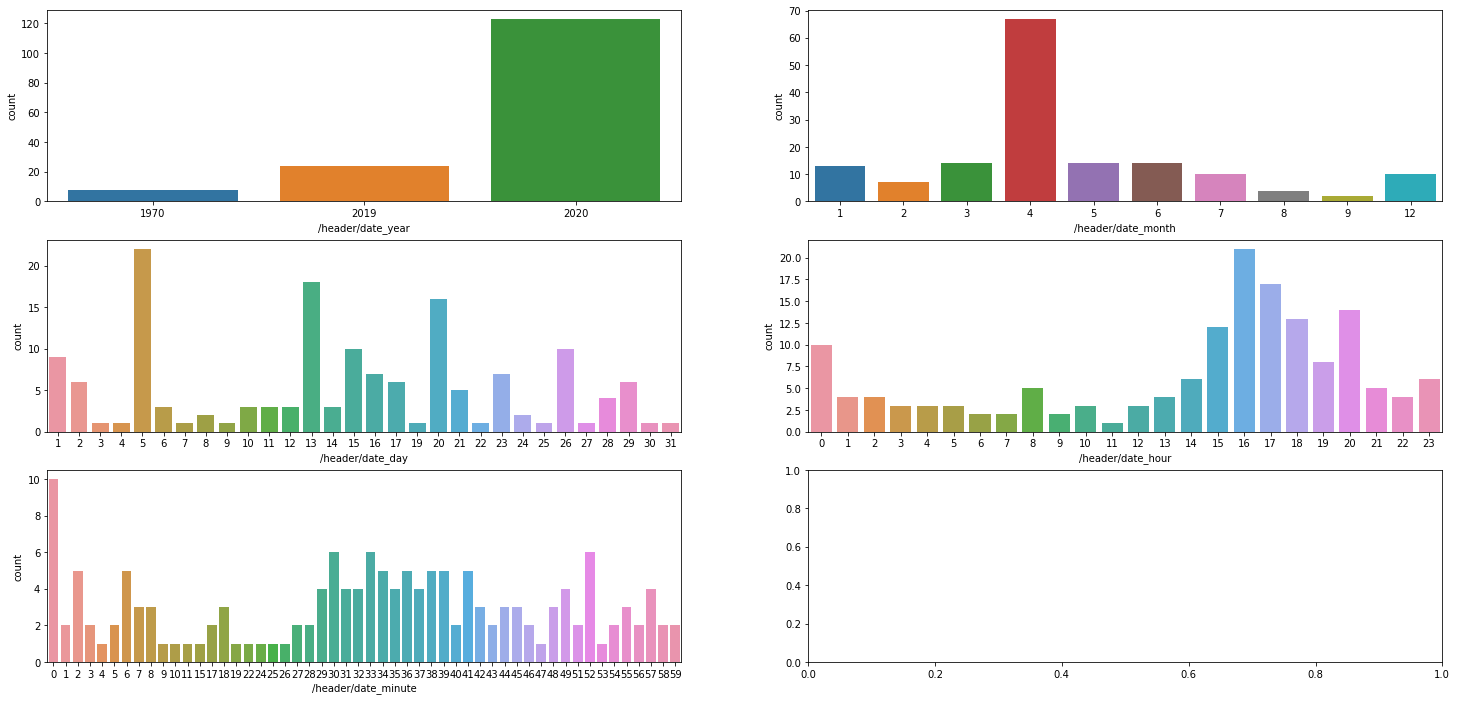

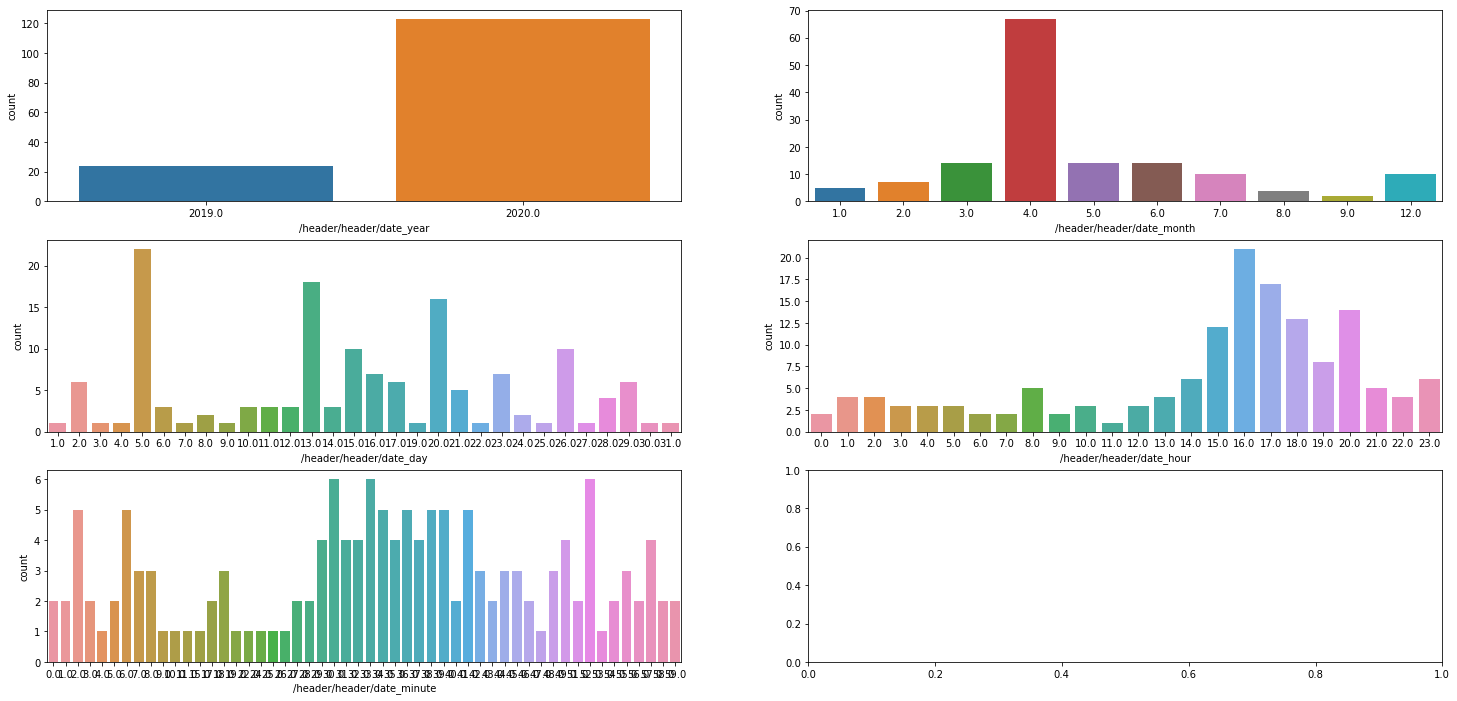

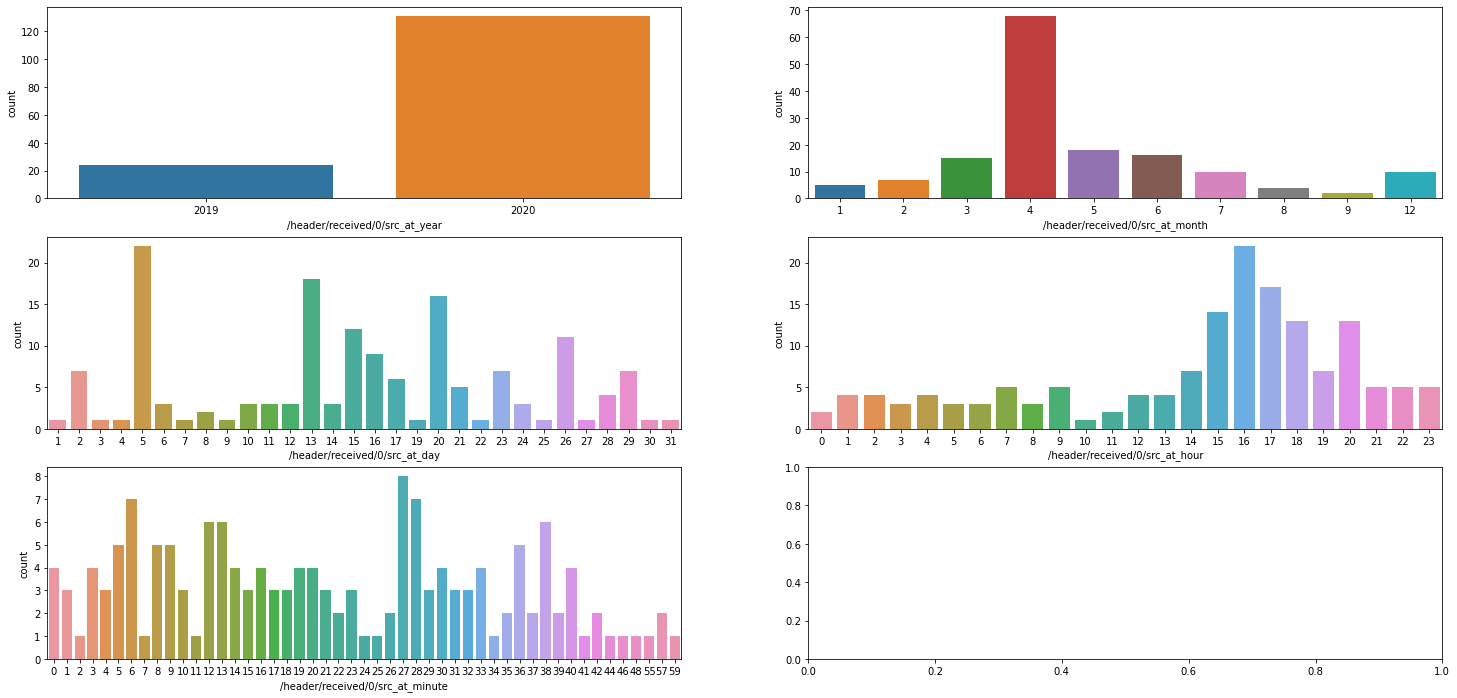

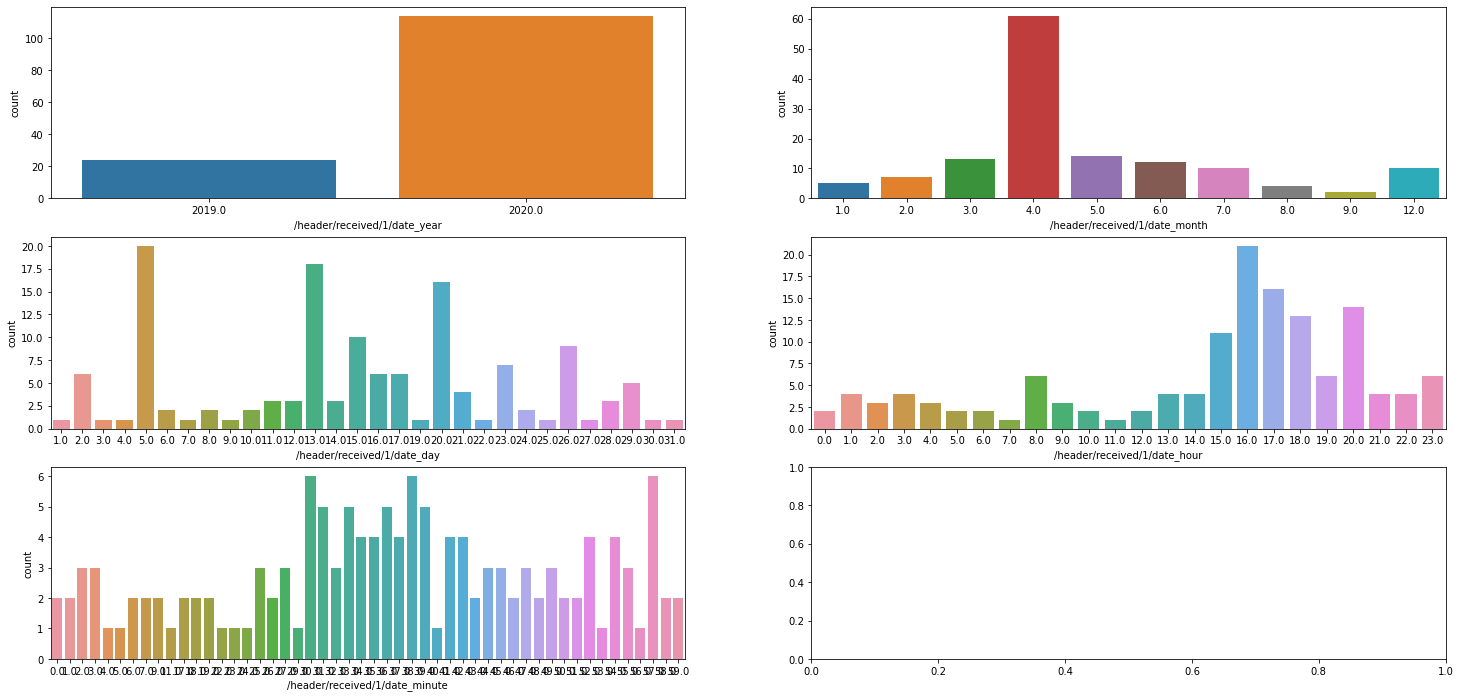

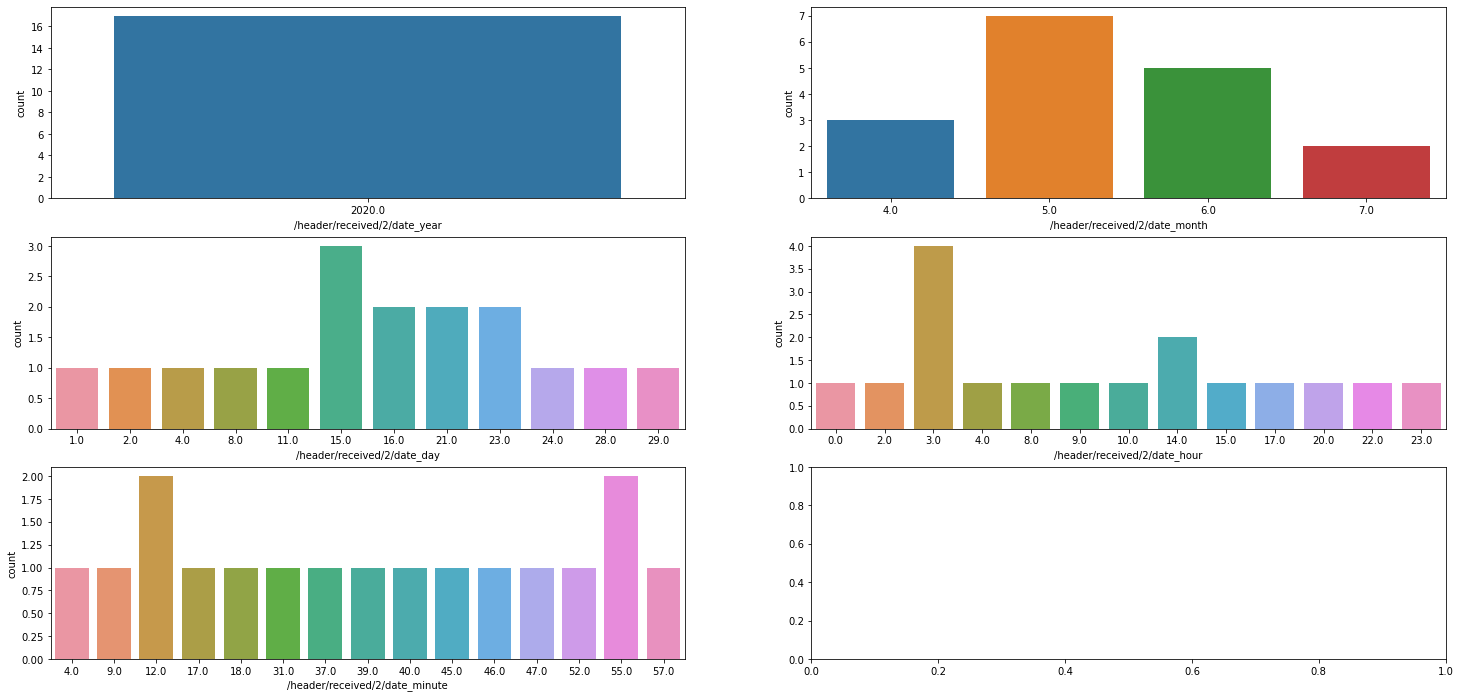

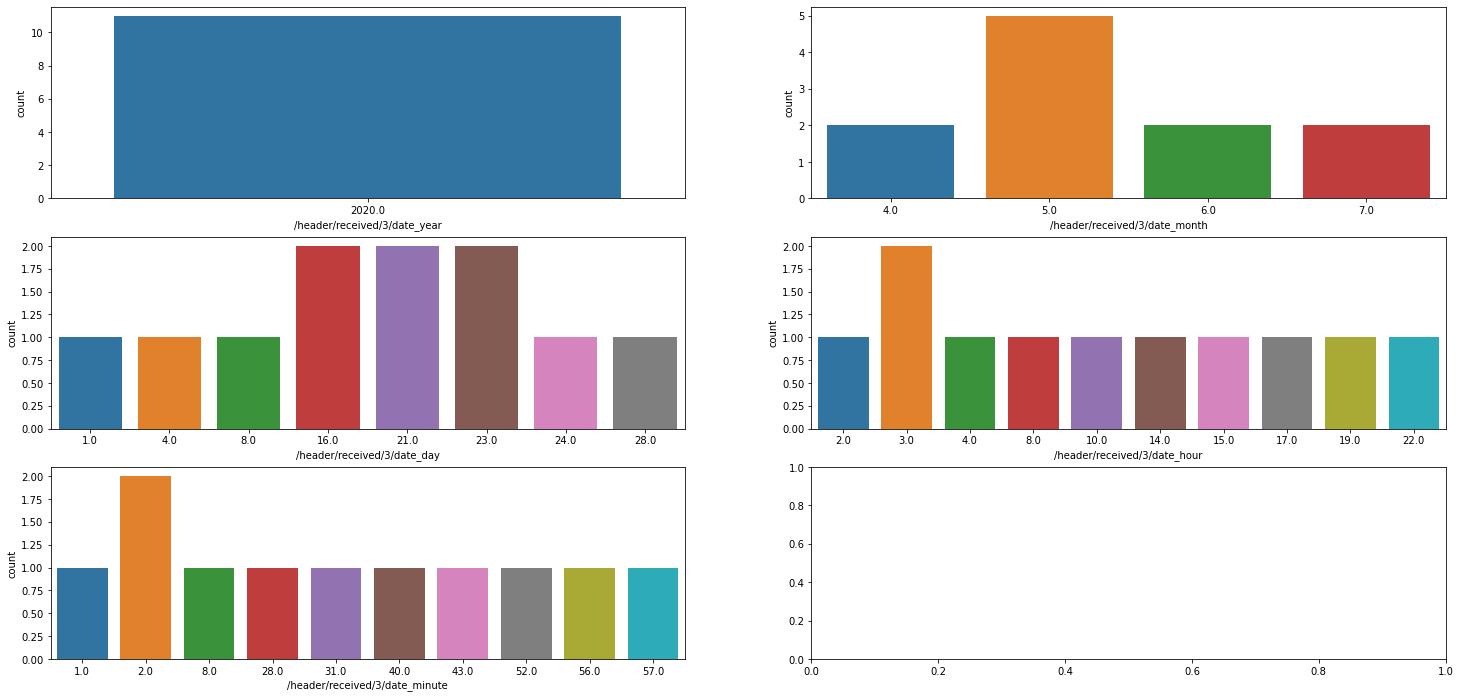

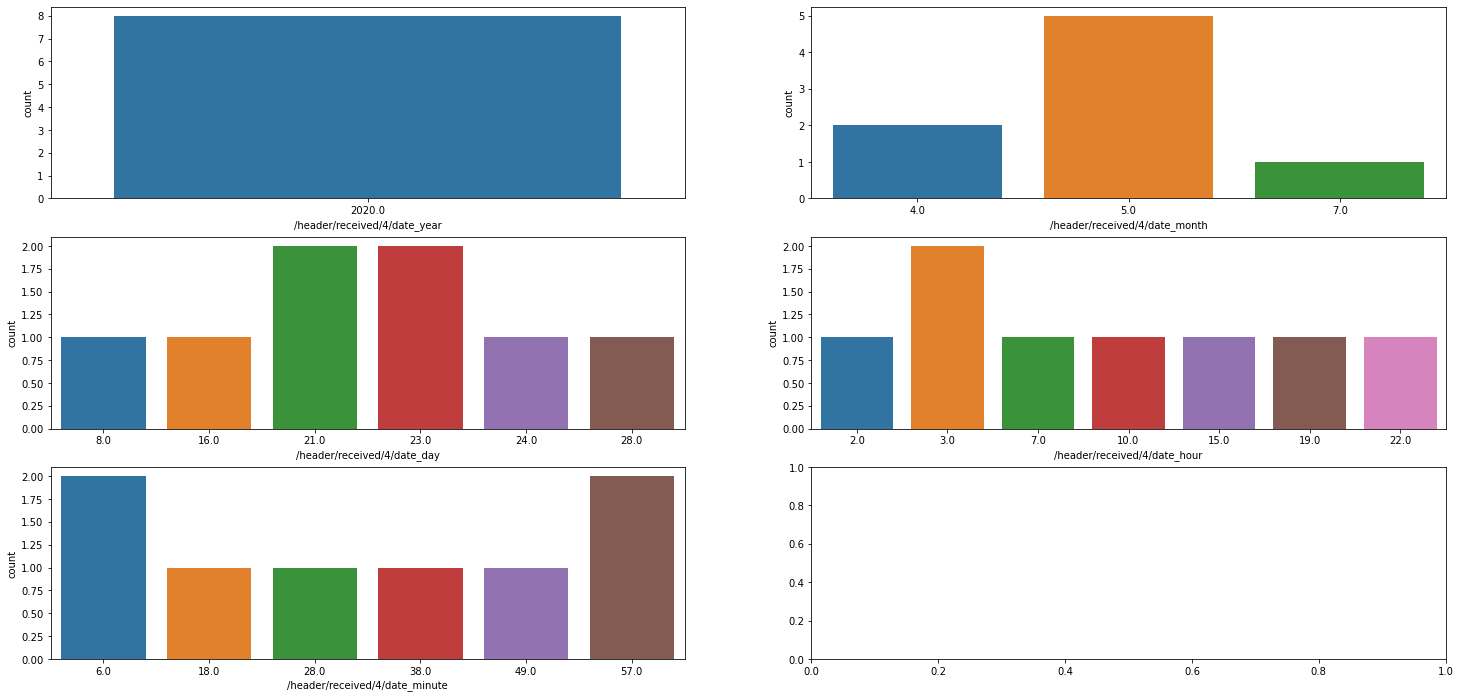

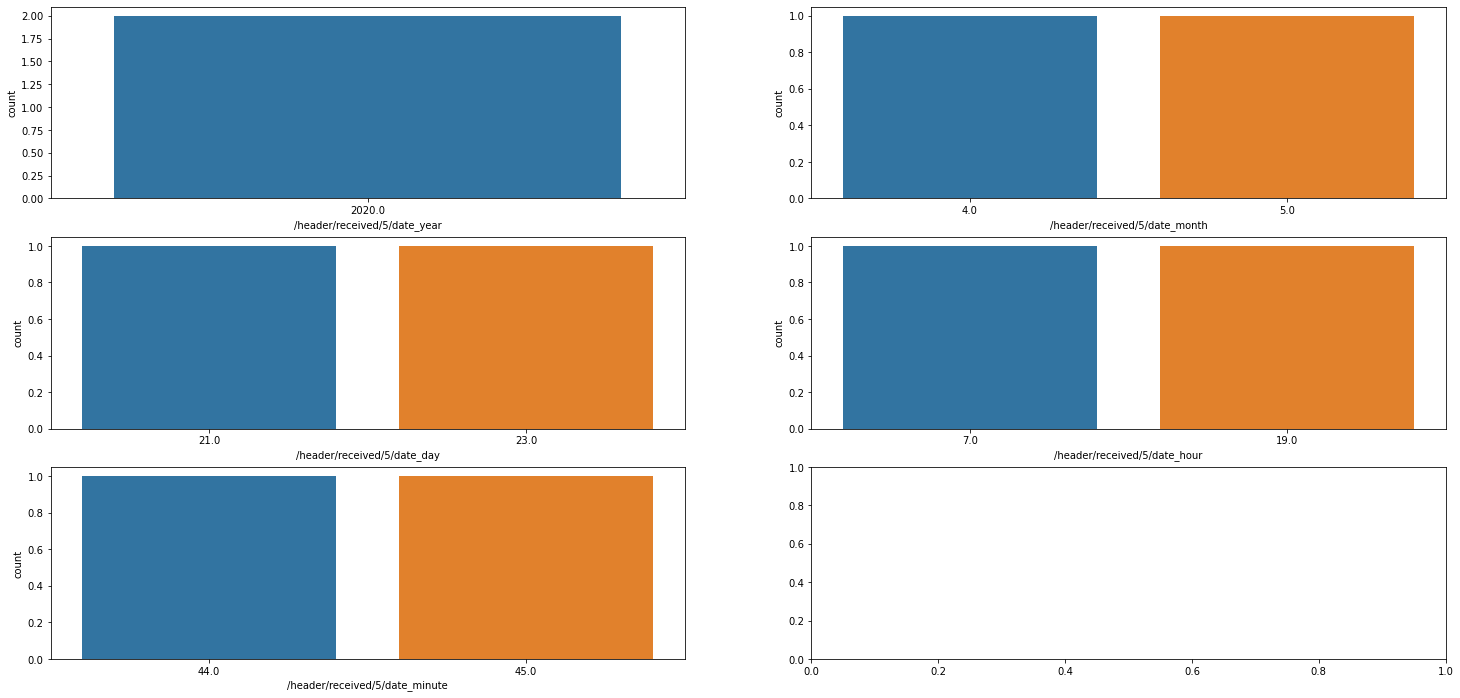

In [7]:
for date_type in date_types:
    visualization_datetime(eml_df, date_type)